In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE

% matplotlib inline

In [6]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v4/yelp_train_df.csv")

smote_features = train_df.columns[:-1]

In [7]:
scaled_target = (train_df["target"].values - min(train_df["target"]))/(
    max(train_df["target"]) - min(train_df["target"]))

target_groups = []

for i in scaled_target:
    target = int(np.floor(i*30))
    target_groups.append(target)

In [9]:
indices_first = [i for i, x in enumerate(target_groups) if x in [0,1]]
indices_last = [i for i, x in enumerate(target_groups) if x in [27,28,29,30]]

for i in indices_first:
    target_groups[i] = 2
for i in indices_last:
    target_groups[i] = 26

In [10]:
smote = SMOTE(ratio="minority", random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_sample(train_df[smote_features].values, 
                                target_groups)
for i in range(24):
    X_res, y_res = smote.fit_sample(X_res, y_res)
    
X_res = pd.DataFrame(X_res, columns=smote_features)

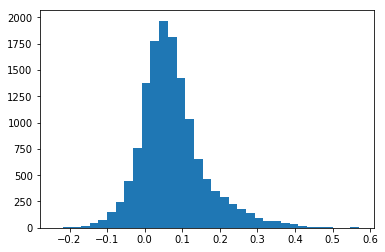

In [11]:
plt.hist(train_df["target"], bins=35)
plt.show()

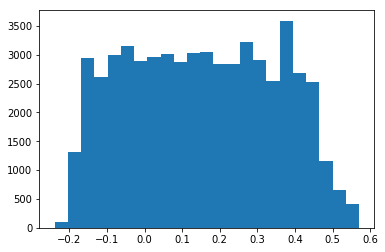

In [12]:
plt.hist(X_res["target"], bins=23)
plt.show()

In [13]:
X_res.to_csv("~/real_estate/data/v4/yelp_train_df_smote.csv", index=False)